In [69]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('Productive Sunday.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'Order ID', 'Order Date', 'Ship Date', 'Customer Name',
       'Country', 'City', 'State', 'Postal Code', 'Region', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [5]:
df.head()

,Unnamed: 0,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,0,CA-2013-152156,09-11-2013,12-11-2013,Claire Gute,USA,Henderson,Kentucky,42420.000000,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960000,2.000000,0.000000,41.913600
1,1,CA-2013-152156,09-11-2013,12-11-2013,Claire Gute,USA,Henderson,Kentucky,42420.000000,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940000,3.000000,0.000000,219.582000
2,2,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,USA,Los Angeles,California,90036.000000,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620000,2.000000,0.000000,6.871400
3,3,US-2012-108966,11-10-2012,18-10-2012,Sean O'Donnell,USA,Fort Lauderdale,Florida,33311.000000,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.577500,5.000000,0.450000,-383.031000
4,4,US-2012-108966,11-10-2012,18-10-2012,Sean O'Donnell,USA,Fort Lauderdale,Florida,33311.000000,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368000,2.000000,0.200000,2.516400


In [6]:
df.dtypes

Unnamed: 0         int64
Order ID          object
Order Date        object
Ship Date         object
Customer Name     object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity         float64
Discount         float64
Profit           float64
dtype: object

In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True )

array([[<AxesSubplot:title={'center':'Postal Code'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Discount'}>],
       [<AxesSubplot:title={'center':'Profit'}>, <AxesSubplot:>]],
      dtype=object)

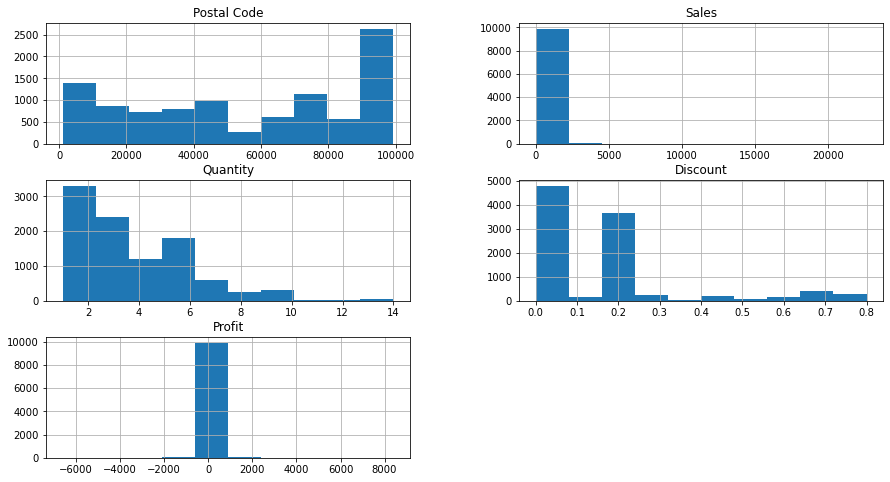

In [8]:
plt.rcParams['figure.figsize'] = [15,8]
df.hist()

In [9]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Customer Name', 'Country',
       'City', 'State', 'Postal Code', 'Region', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [10]:
df.shape

(9995, 16)

In [11]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Order ID,0,0.000000
Order Date,0,0.000000
Ship Date,0,0.000000
Customer Name,0,0.000000
Country,0,0.000000
City,0,0.000000
State,0,0.000000
Postal Code,0,0.000000
Region,0,0.000000
Category,0,0.000000


In [20]:
import datetime as dt
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Date']=df['Order Date'].map(dt.datetime.toordinal)

In [24]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Ship Date']=df['Ship Date'].map(dt.datetime.toordinal)

In [25]:
df_num=df.select_dtypes(include=np.number)

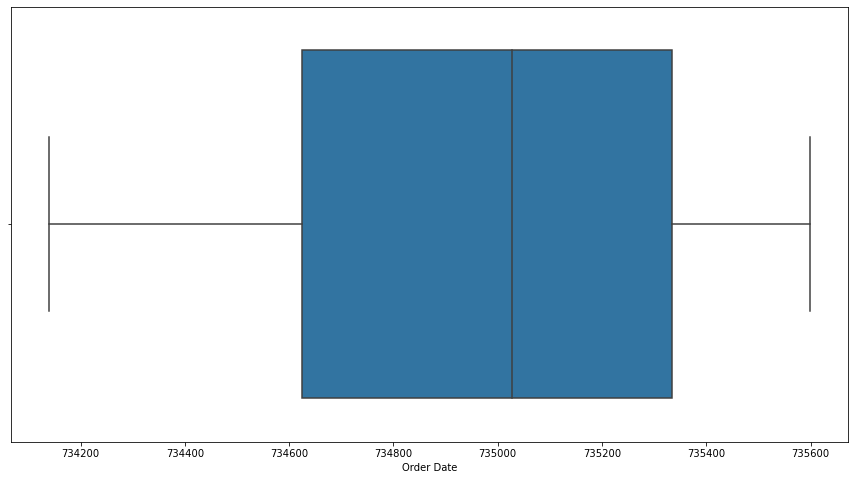

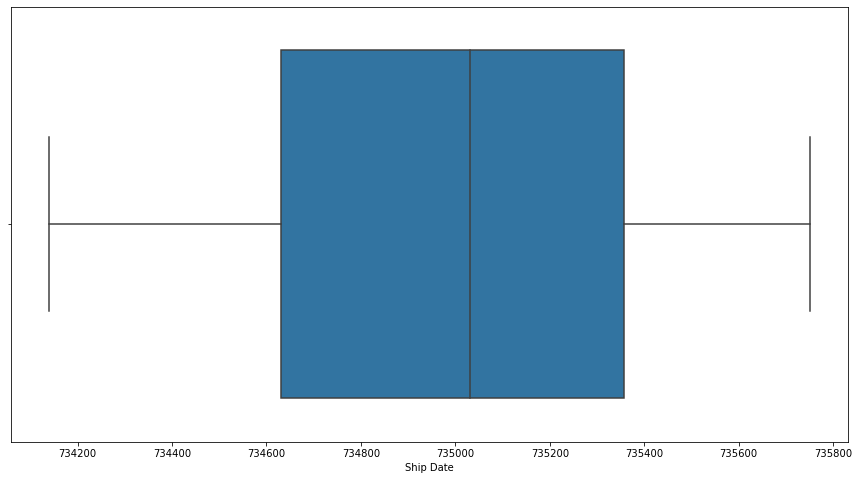

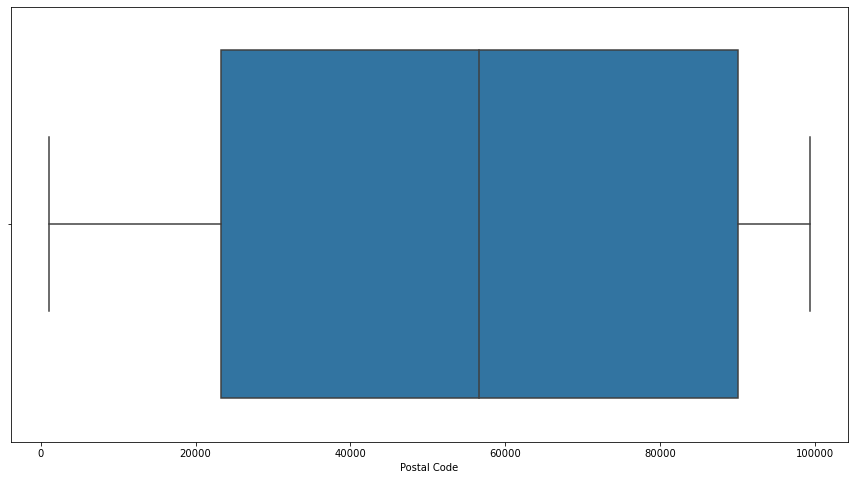

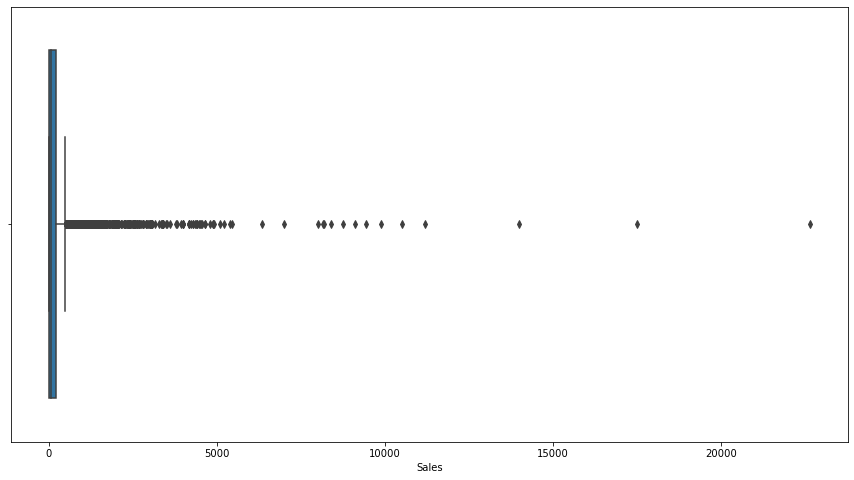

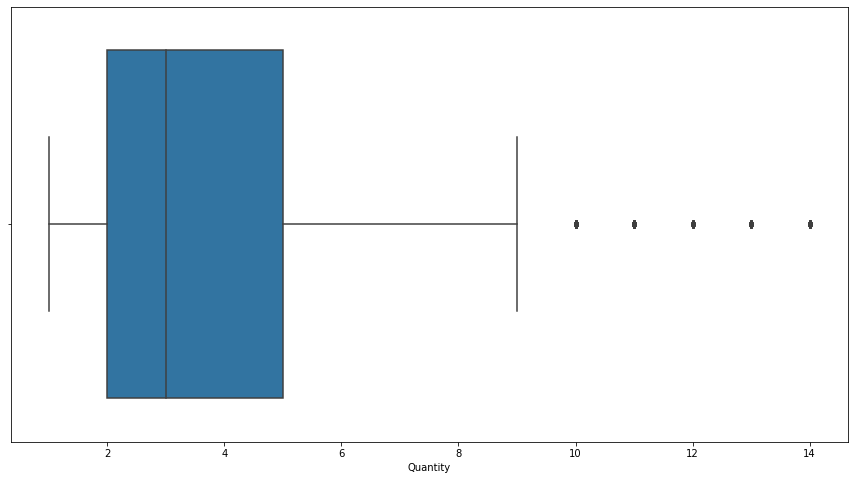

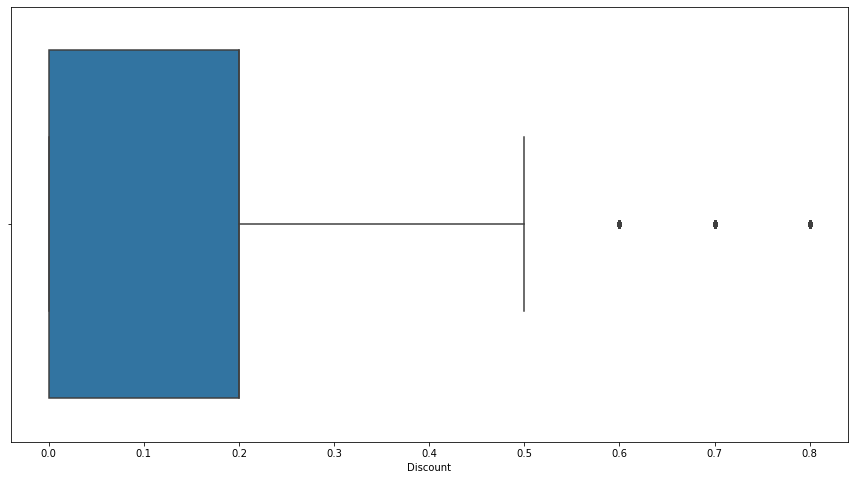

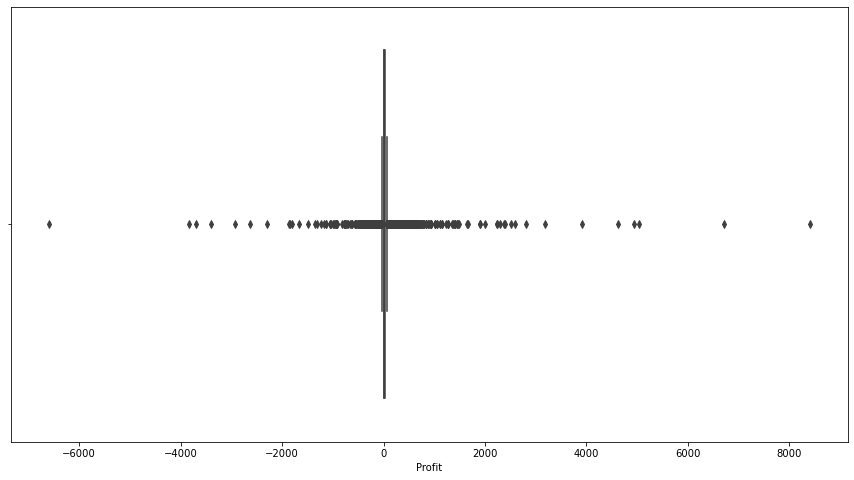

In [26]:
for i in df_num.columns:
    sns.boxplot(df_num[i])
    plt.show()
    

In [18]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Customer Name', 'Country',
       'City', 'State', 'Postal Code', 'Region', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [27]:
df.dtypes

Order ID          object
Order Date         int64
Ship Date          int64
Customer Name     object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity         float64
Discount         float64
Profit           float64
dtype: object

In [29]:
df.shape

(9995, 16)

In [30]:
# calculate the first quartile
Q1 = df.quantile(0.25)

# calculate the third quartile
Q3 = df.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# check the shape of the data
df.shape

(7144, 16)

In [31]:
df_num=df.select_dtypes(include=np.number)
df_num.head()

,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
0,735122,735213,42420.000000,261.960000,2.000000,0.000000,41.913600
2,735032,735036,90036.000000,14.620000,2.000000,0.000000,6.871400
4,734817,734794,33311.000000,22.368000,2.000000,0.200000,2.516400
5,734386,734302,90032.000000,48.860000,7.000000,0.000000,14.169400
6,734386,734302,90032.000000,7.280000,4.000000,0.000000,1.965600


In [55]:
df_cat=df.select_dtypes(exclude=np.number)
df_cat.head()

,Order ID,Customer Name,Country,City,State,Region,Category,Sub-Category,Product Name
0,CA-2013-152156,Claire Gute,USA,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase
2,CA-2013-138688,Darrin Van Huff,USA,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
4,US-2012-108966,Sean O'Donnell,USA,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System
5,CA-2011-115812,Brosina Hoffman,USA,Los Angeles,California,West,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...
6,CA-2011-115812,Brosina Hoffman,USA,Los Angeles,California,West,Office Supplies,Art,Newell 322


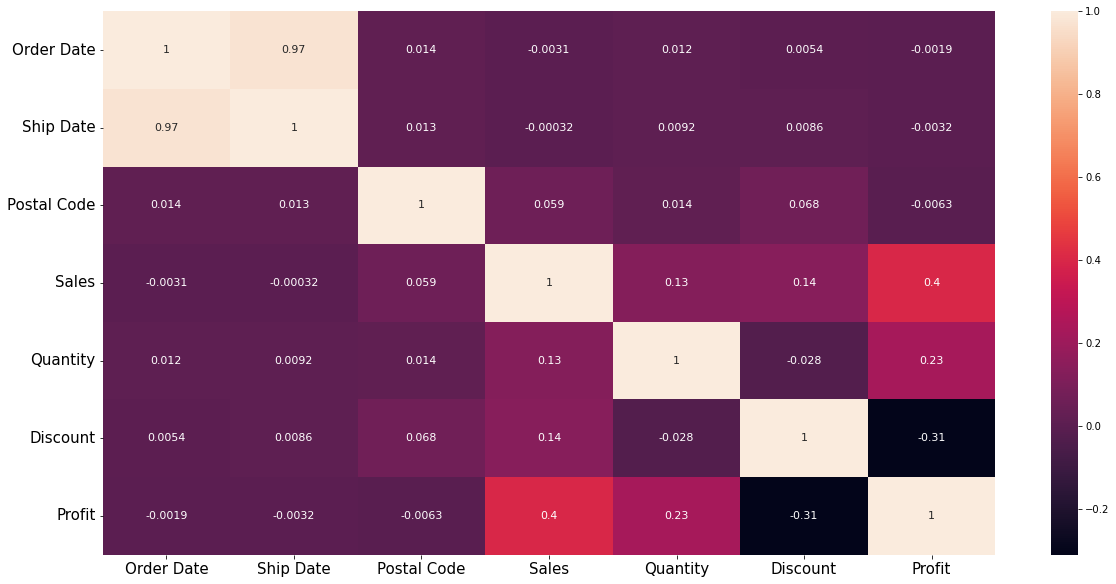

In [35]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (20,10))

# plot the heat map
# corr(): give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: used to set the font size of the annotation
sns.heatmap(df.corr(), annot = True, annot_kws = {"size": 11})

# rotation = 'horizontal' rotates the y-axis labels horizontally
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)

# display the plot
plt.show()

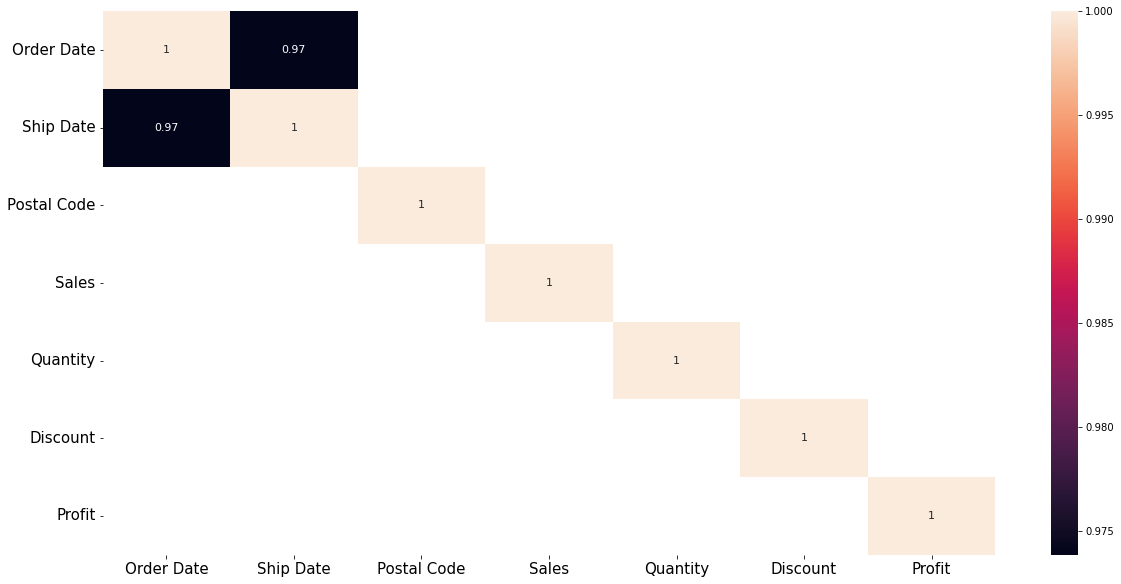

In [36]:
plt.figure(figsize = (20,10))

# plot the heat map
# corr(): give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
sns.heatmap(df.corr()[np.abs(df.corr()) > 0.6], annot = True, annot_kws = {"size": 11})

# rotate the y-axis labels
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)

# display the plot
plt.show()

In [39]:
df = df.drop(['Order Date', 'Ship Date'],axis=1)

In [40]:
df.columns

Index(['Order ID', 'Customer Name', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

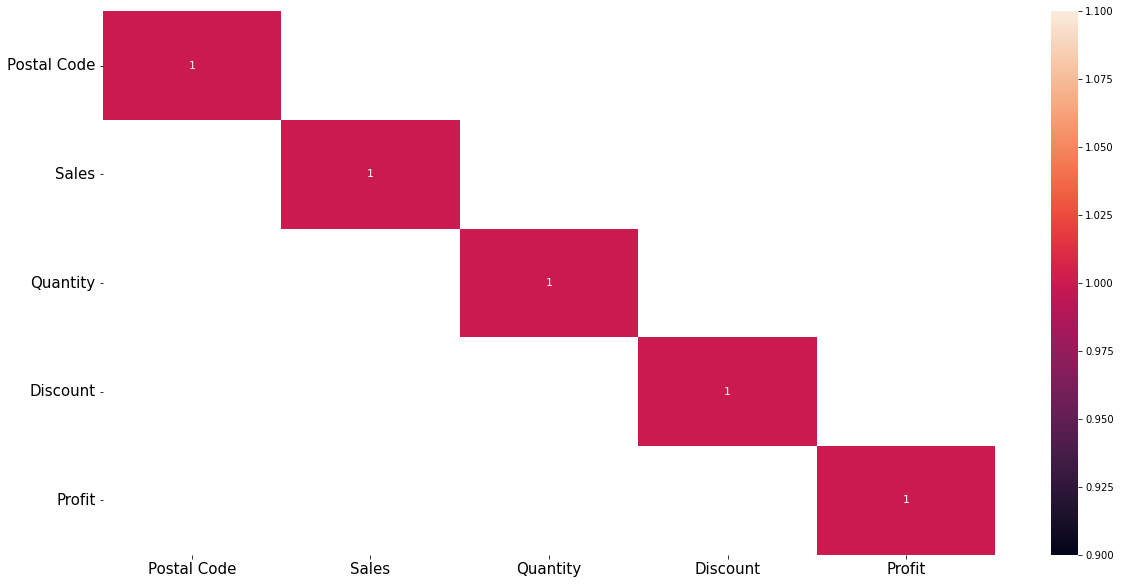

In [41]:
plt.figure(figsize = (20,10))

# plot the heat map
# corr(): give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
sns.heatmap(df.corr()[np.abs(df.corr()) > 0.6], annot = True, annot_kws = {"size": 11})

# rotate the y-axis labels
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)

# display the plot
plt.show()

In [42]:
df_num=df.select_dtypes(include=np.number)
df_num.head()

,Postal Code,Sales,Quantity,Discount,Profit
0,42420.000000,261.960000,2.000000,0.000000,41.913600
2,90036.000000,14.620000,2.000000,0.000000,6.871400
4,33311.000000,22.368000,2.000000,0.200000,2.516400
5,90032.000000,48.860000,7.000000,0.000000,14.169400
6,90032.000000,7.280000,4.000000,0.000000,1.965600


In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [45]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_num.values, i) for i in range(df_num.shape[1])]

# create a column of variable names
vif["Features"] = df_num.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,3.120663,Quantity
1,2.699874,Postal Code
2,2.227962,Profit
3,2.185586,Sales
4,1.991142,Discount


In [ ]:
df_num = df_num.drop('Profit', axis = 1)

In [48]:
# create dataframe of target variable
df_target = df['Profit']

In [56]:
df_cat=df_cat.drop(['Order ID','Customer Name'],axis=1)

In [57]:
encoded_data = pd.get_dummies(data = df_cat, drop_first=True)

In [58]:
encoded_data.head()

City_Akron  City_Albuquerque  City_Alexandria  City_Allen  City_Allentown  \
0           0                 0                0           0               0   
2           0                 0                0           0               0   
4           0                 0                0           0               0   
5           0                 0                0           0               0   
6           0                 0                0           0               0   

   City_Altoona  City_Amarillo  City_Anaheim  City_Andover  City_Ann Arbor  \
0             0              0             0             0               0   
2             0              0             0             0               0   
4             0              0             0             0               0   
5             0              0             0             0               0   
6             0              0             0             0               0   

   City_Antioch  City_Apopka  City_Apple Valley  City_Appleton  \
0             0            0                  0              0   
2             0            0                  0              0   
4             0            0                  0              0   
5             0            0                  0              0   
6             0            0                  0              0   

   City_Arlington  City_Arlington Heights  City_Arvada  City_Asheville  \
0               0                       0            0               0   
2               0                       0            0               0   
4               0                       0            0               0   
5               0                       0            0               0   
6               0                       0            0               0   

   City_Athens  City_Atlanta  City_Atlantic City  City_Auburn  City_Aurora  \
0            0             0                   0            0            0   
2            0             0                   0            0            0   
4            0             0                   0            0            0   
5            0             0                   0            0            0   
6            0             0                   0            0            0   

   City_Austin  City_Avondale  City_Bakersfield  City_Baltimore  City_Bangor  \
0            0              0                 0               0            0   
2            0              0                 0               0            0   
4            0              0                 0               0            0   
5            0              0                 0               0            0   
6            0              0                 0               0            0   

   City_Bartlett  City_Bayonne  City_Baytown  City_Beaumont  City_Bedford  \
0              0             0             0              0             0   
2              0             0             0              0             0   
4              0             0             0              0             0   
5              0             0             0              0             0   
6              0             0             0              0             0   

   City_Belleville  City_Bellevue  City_Bellingham  City_Bethlehem  \
0                0              0                0               0   
2                0              0                0               0   
4                0              0                0               0   
5                0              0                0               0   
6                0              0                0               0   

   City_Beverly  City_Billings  City_Bloomington  City_Boca Raton  City_Boise  \
0             0              0                 0                0           0   
2             0              0                 0                0           0   
4             0              0                 0                0           0   
5             0              0                 0     

In [59]:
encoded_data.shape

(7144, 2223)

In [60]:
df_cat.columns

Index(['Country', 'City', 'State', 'Region', 'Category', 'Sub-Category',
       'Product Name'],
      dtype='object')

In [61]:
df_X = pd.concat([df_num, encoded_data], axis=1)

# display first five observations
df_X.head()

Postal Code      Sales  Quantity  Discount  City_Akron  City_Albuquerque  \
0 42420.000000 261.960000  2.000000  0.000000           0                 0   
2 90036.000000  14.620000  2.000000  0.000000           0                 0   
4 33311.000000  22.368000  2.000000  0.200000           0                 0   
5 90032.000000  48.860000  7.000000  0.000000           0                 0   
6 90032.000000   7.280000  4.000000  0.000000           0                 0   

   City_Alexandria  City_Allen  City_Allentown  City_Altoona  City_Amarillo  \
0                0           0               0             0              0   
2                0           0               0             0              0   
4                0           0               0             0              0   
5                0           0               0             0              0   
6                0           0               0             0              0   

   City_Anaheim  City_Andover  City_Ann Arbor  City_Antioch  City_Apopka  \
0             0             0               0             0            0   
2             0             0               0             0            0   
4             0             0               0             0            0   
5             0             0               0             0            0   
6             0             0               0             0            0   

   City_Apple Valley  City_Appleton  City_Arlington  City_Arlington Heights  \
0                  0              0               0                       0   
2                  0              0               0                       0   
4                  0              0               0                       0   
5                  0              0               0                       0   
6                  0              0               0                       0   

   City_Arvada  City_Asheville  City_Athens  City_Atlanta  City_Atlantic City  \
0            0               0            0             0                   0   
2            0               0            0             0                   0   
4            0               0            0             0                   0   
5            0               0            0             0                   0   
6            0               0            0             0                   0   

   City_Auburn  City_Aurora  City_Austin  City_Avondale  City_Bakersfield  \
0            0            0            0              0                 0   
2            0            0            0              0                 0   
4            0            0            0              0                 0   
5            0            0            0              0                 0   
6            0            0            0              0                 0   

   City_Baltimore  City_Bangor  City_Bartlett  City_Bayonne  City_Baytown  \
0               0            0              0             0             0   
2               0            0              0             0             0   
4               0            0              0             0             0   
5               0            0              0             0             0   
6               0            0              0             0             0   

   City_Beaumont  City_Bedford  City_Belleville  City_Bellevue  \
0              0             0                0              0   
2              0             0                0              0   
4              0             0                0              0   
5              0             0                0              0   
6              0             0                0              0   

   City_Bellingham  City_Bethlehem  City_Beverly  City_Billings  \
0                0               0             0              0   
2                0               0             0              0   
4                0               0             0              0   
5                0               0         

In [62]:
# create a copy of 'df_compensation_dummy' and store in the dataframe 'X_full'
X_full = df_X.copy()

# dependent variable
# create a copy of 'df_target' and store in the dataframe 'y_full'
y_full = df_target.copy()

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_full = sm.add_constant(X_full)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_full', X_train_full.shape)
print('y_train_full', y_train_full.shape)

# print dimension of test set
print('X_test_full', X_test_full.shape)
print('y_test_full', y_test_full.shape)

X_train_full (5000, 2228)
y_train_full (5000,)
X_test_full (2144, 2228)
y_test_full (2144,)


In [63]:
MLR_full_model = sm.OLS(y_train_full, X_train_full).fit()

# print the summary output
print(MLR_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     8.970
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        09:22:20   Log-Likelihood:                -16312.
No. Observations:                5000   AIC:                         3.676e+04
Df Residuals:                    2930   BIC:                         5.025e+04
Df Model:                        2069                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
-

In [64]:
y_pred_full = MLR_full_model.predict(X_test_full)

In [65]:
y_pred_full.head()

2929   18.949706
4051   -8.423019
5237   15.616437
3255    5.959455
9738   22.778845
dtype: float64

In [67]:
train_pred = MLR_full_model.predict(X_train_full)

# predict the output of the target variable from the test data
test_pred = MLR_full_model.predict(X_test_full)

In [70]:
mse_train = round(mean_squared_error(y_train_full, train_pred),4)

# print the MSE for the training set
print("Mean Squared Error (MSE) on training set: ", mse_train)

# calculate the MSE for the test data
# round the value upto 4 digits using 'round()'
mse_test = round(mean_squared_error(y_test_full, test_pred),4)

# print the MSE for the test set
print("Mean Squared Error (MSE) on test set: ", mse_test)

Mean Squared Error (MSE) on training set:  39.9206
Mean Squared Error (MSE) on test set:  137.7514


In [71]:
# calculate the MAE using the "mean_absolute_error" function

# calculate the MAE for the train data
# round the value upto 4 digits using 'round()'
mae_train = round(mean_absolute_error(y_train_full, train_pred),4)

# print the MAE for the training set
print("Mean Absolute Error (MAE) on training set: ", mae_train)

# calculate the MAE for the test data
# round the value upto 4 digits using 'round()'
mae_test = round(mean_absolute_error(y_test_full, test_pred),4)

# print the MAE for the test set
print("Mean Absolute Error (MAE) on test set: ", mae_test)

Mean Absolute Error (MAE) on training set:  4.1394
Mean Absolute Error (MAE) on test set:  7.8926


In [72]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

In [73]:
mape_train = round(mape(y_train_full, train_pred),4)

# print the MAPE for the training set
print("Mean Absolute Percentage Error (MAPE) on training set: ", mape_train)

# calculate the MAPE for the test data
# round the value upto 4 digits using 'round()'
mape_test = round(mape(y_test_full, test_pred),4)

# print the MAPE for the test set
print("Mean Absolute Percentage Error (MAPE) on test set: ", mape_test)

Mean Absolute Percentage Error (MAPE) on training set:  inf
Mean Absolute Percentage Error (MAPE) on test set:  inf
